<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220921_MNIST_%EC%8B%A4%EC%8A%B501.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/MyDrive /mydrive

In [ ]:
%cd /mydrive

/content/drive/MyDrive


In [ ]:
!mkdir mnist

## __CNN Layer 구조 변경 & 드롭아웃 일괄적용__
---
epoch수를 늘리고 callback함수를 넣되 patience 횟수를 키운다.

SGD, adam, rmsprop 각 optimizer별 batch_size를 변경해볼 것

### **1. Library Import**

In [ ]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


### **2. 데이터 확인 및 전처리**

In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [ ]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __모델 변경__

---
CNN 특성 및 MNIST 자료 특성을 고려할 때, 초기의 세부적인 데이터 정보보다 여러 필터를 거치고난 후의 구조적인 특징정보가 판단에 더 중요할 것이라고 가정하고 출력층에 가까울수록 필터 수를 점점 키워 가중치 변화에 따른 영향을 줄여나가는 방식으로 수정

Dropout 추가 (64-0.2, 128-0.5)
epoch=100 EarlyStop patient = 10으로 키워서 진행해본다. 

#### __1. batch_size default(32), 출력 직전층 activation='sigmoid', optimizer='SGD'__ 

In [ ]:
import keras

In [ ]:
model_1 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.Dropout(0.2),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
model_1.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try01.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1 = model_1.fit(train_imgs, train_labels, epochs=100, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
1499/1500 [============================>.] - ETA: 0s - loss: 1.3171 - accuracy: 0.6249
Epoch 1: val_accuracy improved from -inf to 0.88975, saving model to mnist/try01.h5
1500/1500 [==============================] - 18s 4ms/step - loss: 1.3165 - accuracy: 0.6250 - val_loss: 0.5019 - val_accuracy: 0.8898
Epoch 2/100
1487/1500 [============================>.] - ETA: 0s - loss: 0.4338 - accuracy: 0.8860
Epoch 2: val_accuracy improved from 0.88975 to 0.93558, saving model to mnist/try01.h5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4332 - accuracy: 0.8862 - val_loss: 0.2736 - val_accuracy: 0.9356
Epoch 3/100
1499/1500 [============================>.] - ETA: 0s - loss: 0.2841 - accuracy: 0.9216
Epoch 3: val_accuracy improved from 0.93558 to 0.95000, saving model to mnist/try01.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2840 - accuracy: 0.9216 - val_loss: 0.1941 - val_accuracy: 0.9500
Epoch 4/100
1499/1500 [======================

In [ ]:
result = model_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9932

테스트 정확도: 0.9932


In [ ]:
loaded_model = load_model('mnist/try01.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0229 - accuracy: 0.9927

불러온 모델 테스트 정확도: 0.9927


In [ ]:
df = pd.DataFrame([['CNN', 'model_1', '32(relu/drop0.2)-64(relu/drop0.2)-128(drop0.5/relu)-Flatten-64(sigmoid)-10(softmax)]', 'SGD', 100, 32, 0.2, 'es/mc', 
                    "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]],
                  columns=['모델', 'Name', 'Structure', 'Optimizer', 'epochs', 'batch_size', 'validation_split', 'callback', 'Accuracy', 'MC_Accuracy', 'Loss', 'MC_Loss'])

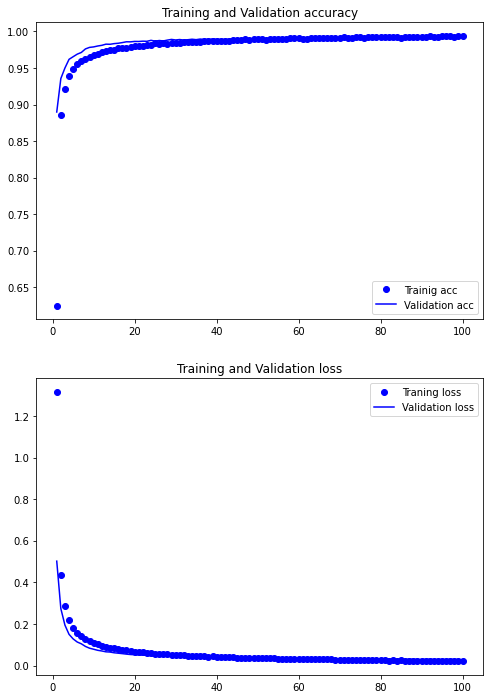

In [ ]:
acc = hist_1.history['accuracy']
val_acc = hist_1.history['val_accuracy']
loss = hist_1.history['loss']
val_loss = hist_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

#### __2. batch_size default(32), 출력 직전층 activation='sigmoid', optimizer='rmsprop'__ 

In [ ]:
model_1_1 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.Dropout(0.2),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_3 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_4 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
model_1_1.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try01_1.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_1 = model_1_1.fit(train_imgs, train_labels, epochs=100, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.2286 - accuracy: 0.9371
Epoch 1: val_accuracy improved from -inf to 0.98125, saving model to mnist/try01_1.h5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2281 - accuracy: 0.9373 - val_loss: 0.0630 - val_accuracy: 0.9812
Epoch 2/100
1495/1500 [============================>.] - ETA: 0s - loss: 0.0753 - accuracy: 0.9772
Epoch 2: val_accuracy improved from 0.98125 to 0.98383, saving model to mnist/try01_1.h5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0540 - val_accuracy: 0.9838
Epoch 3/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9830
Epoch 3: val_accuracy improved from 0.98383 to 0.98708, saving model to mnist/try01_1.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0451 - val_accuracy: 0.9871
Epoch 4/100
1500/1500 [=================

In [ ]:
result = model_1_1.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9927

테스트 정확도: 0.9927


In [ ]:
loaded_model = load_model('mnist/try01_1.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9927

불러온 모델 테스트 정확도: 0.9927


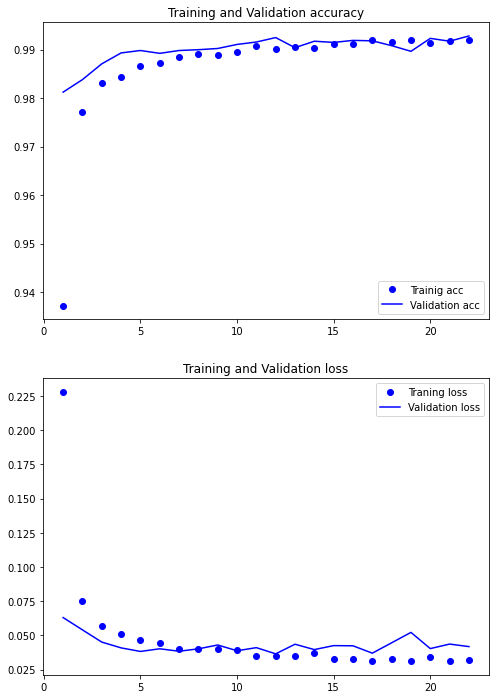

In [ ]:
acc = hist_1_1.history['accuracy']
val_acc = hist_1_1.history['val_accuracy']
loss = hist_1_1.history['loss']
val_loss = hist_1_1.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df.loc[1]=['CNN', 'model_1_1', '32(relu/drop0.2)-64(relu/drop0.2)-128(drop0.5/relu)-Flatten-64(sigmoid)-10(softmax)]', 'rmsprop', 100, 32, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

#### __3. batch_size default(32), 출력 직전층 activation='sigmoid', optimizer='adam'__ 

In [ ]:
model_1_2 = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.Dropout(0.2),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(0.2),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_1_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_6 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 dropout_7 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
model_1_2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('mnist/try01_2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
hist_1_2 = model_1_2.fit(train_imgs, train_labels, epochs=100, validation_split=0.2, callbacks=[es, mc])

Epoch 1/100
1490/1500 [============================>.] - ETA: 0s - loss: 0.2382 - accuracy: 0.9365
Epoch 1: val_accuracy improved from -inf to 0.98225, saving model to mnist/try01_2.h5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2373 - accuracy: 0.9366 - val_loss: 0.0654 - val_accuracy: 0.9822
Epoch 2/100
1494/1500 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9782
Epoch 2: val_accuracy improved from 0.98225 to 0.98725, saving model to mnist/try01_2.h5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0734 - accuracy: 0.9782 - val_loss: 0.0437 - val_accuracy: 0.9872
Epoch 3/100
1488/1500 [============================>.] - ETA: 0s - loss: 0.0541 - accuracy: 0.9837
Epoch 3: val_accuracy improved from 0.98725 to 0.98958, saving model to mnist/try01_2.h5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0544 - accuracy: 0.9836 - val_loss: 0.0372 - val_accuracy: 0.9896
Epoch 4/100
1494/1500 [=================

In [ ]:
result = model_1_2.evaluate(test_imgs, test_labels)
print("\n테스트 정확도: %.4f" %(result)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0224 - accuracy: 0.9939

테스트 정확도: 0.9939


In [ ]:
loaded_model = load_model('mnist/try01_2.h5')
result_loaded = loaded_model.evaluate(test_imgs, test_labels)
print("\n불러온 모델 테스트 정확도: %.4f" %(result_loaded)[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.9939

불러온 모델 테스트 정확도: 0.9939


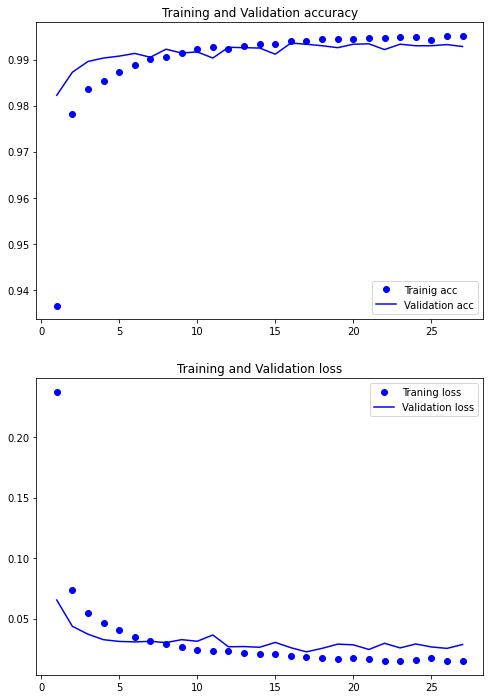

In [ ]:
acc = hist_1_2.history['accuracy']
val_acc = hist_1_2.history['val_accuracy']
loss = hist_1_2.history['loss']
val_loss = hist_1_2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.figure(figsize=(8, 12))
ax1=plt.subplot(2, 1, 1)
ax2=plt.subplot(2, 1, 2)
ax1.plot(epochs, acc, 'bo', label='Trainig acc')
ax1.plot(epochs, val_acc, 'b', label='Validation acc')
ax1.set_title("Training and Validation accuracy")
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Traning loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title("Training and Validation loss")
ax2.legend()
plt.show()

In [ ]:
df.loc[2]=['CNN', 'model_1_2', '32(relu/drop0.2)-64(relu/drop0.2)-128(drop0.5/relu)-Flatten-64(sigmoid)-10(softmax)]', 'adam', 100, 32, 0.2, 'es/mc', "%.4f"%(result)[1], "%.4f"%(result_loaded)[1], "%.4f"%(result)[0], "%.4f"%(result_loaded)[0]]

In [ ]:
df.head()

,모델,Name,Structure,Optimizer,epochs,batch_size,validation_split,callback,Accuracy,MC_Accuracy,Loss,MC_Loss
0,CNN,model_1,32(relu/drop0.2)-64(relu/drop0.2)-128(drop0.5/...,SGD,100,32,0.2,es/mc,0.9932,0.9927,0.0223,0.0229
1,CNN,model_1_1,32(relu/drop0.2)-64(relu/drop0.2)-128(drop0.5/...,rmsprop,100,32,0.2,es/mc,0.9927,0.9927,0.0350,0.0350
2,CNN,model_1_2,32(relu/drop0.2)-64(relu/drop0.2)-128(drop0.5/...,adam,100,32,0.2,es/mc,0.9939,0.9939,0.0224,0.0200
